In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("C:/Users/SIDDU/Desktop/DA project/netflix_titles.csv")

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
df.shape

(8807, 12)

In [29]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [31]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [35]:
df['director'].fillna('Not available',inplace = True)
df['cast'].fillna('Not available',inplace = True)


In [38]:
df['country'].fillna('Unknown',inplace = True)

In [39]:
df = df.dropna(subset = ['date_added'])

In [43]:
df['rating'].fillna('Not Rated', inplace = True)

In [46]:
df['duration'].fillna('Not known', inplace = True)

# EDA (Exploratory Data Analysis)

Since all the columns with null values are being cleaned its time for EDA.

EDA : Exploratory Data Analysis (EDA) is the process of examining and visualizing a dataset to understand its structure, patterns, trends, and anomalies. It helps identify missing values, outliers, relationships between variables, and guides data cleaning and feature selection. EDA is a crucial step in data analysis that provides insights before applying machine learning or statistical models.

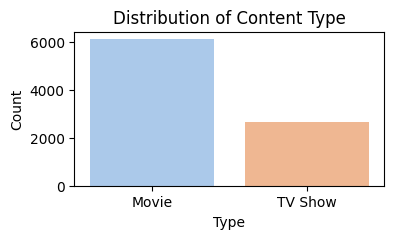

In [57]:
# What is the distribution between Movies and TV shows

plt.figure(figsize = (4,2))
sns.countplot(data=df, x='type', hue='type', palette='pastel', legend=False)
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

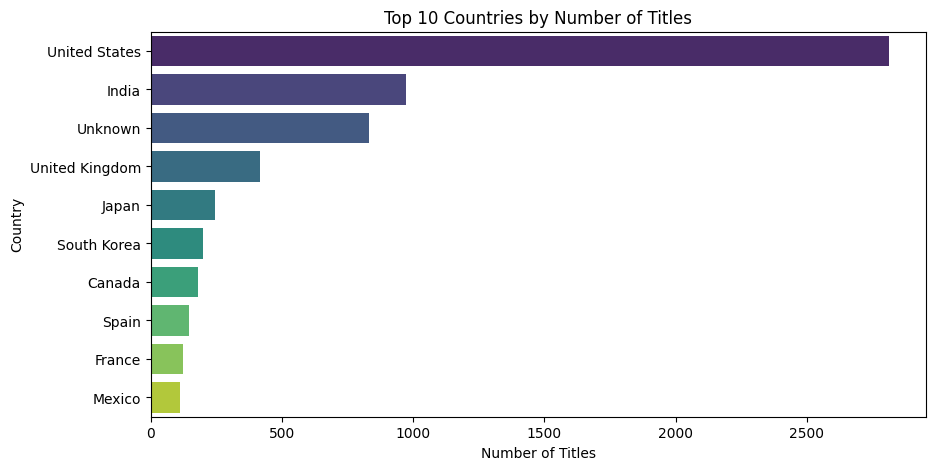

In [59]:
# What are the top 10 countries producing content

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='viridis', legend=False)
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


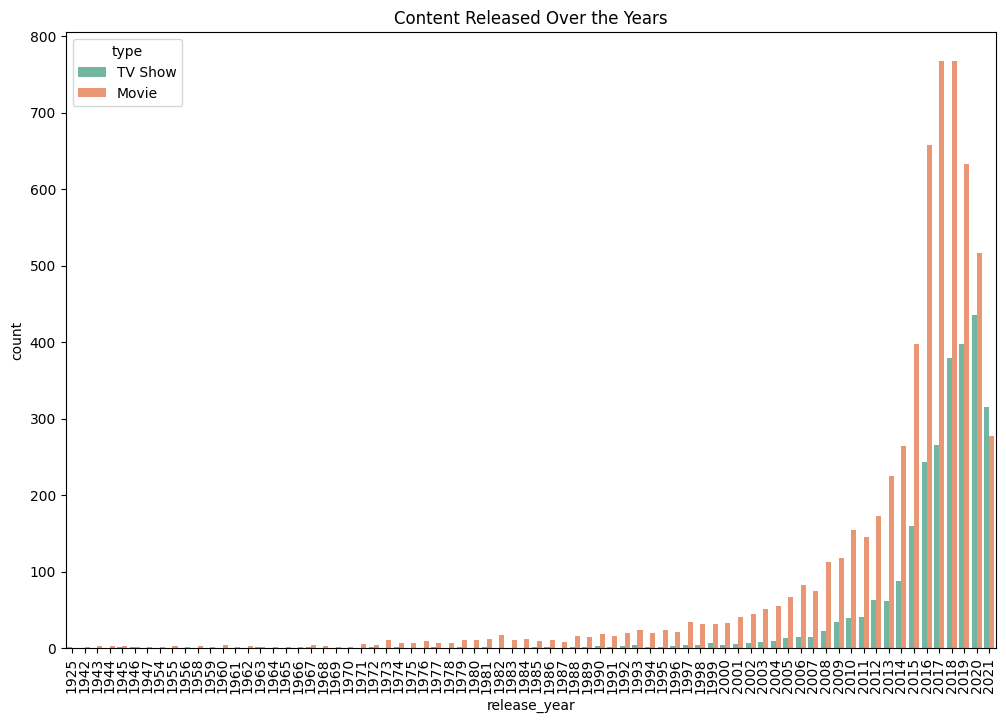

In [64]:
# Content released over the years

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='release_year', hue='type', order=sorted(df['release_year'].unique()), palette='Set2')
plt.title("Content Released Over the Years")
plt.xticks(rotation=90)
plt.show()


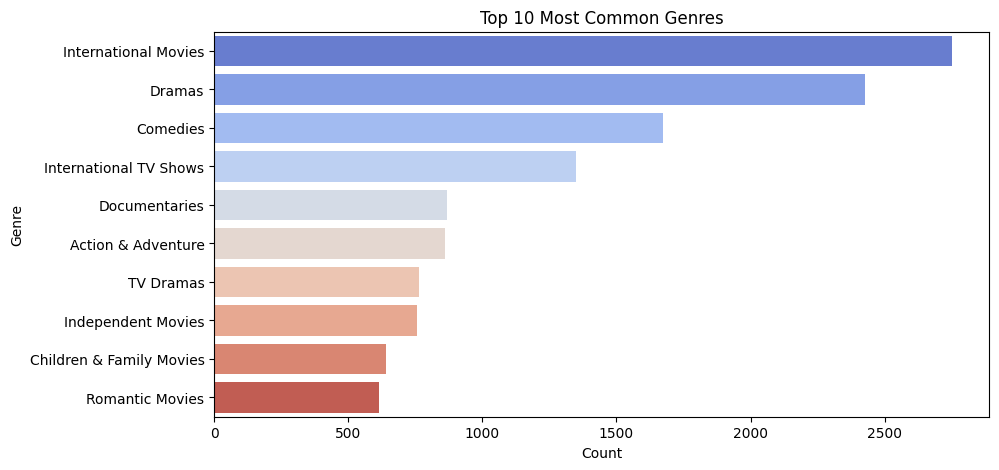

In [66]:
# Top genres (Categories)

from collections import Counter

# Split all genres and count
genre_list = df['listed_in'].str.split(', ')
all_genres = sum(genre_list.tolist(), [])
genre_counts = Counter(all_genres).most_common(10)

# Visualize
genres, counts = zip(*genre_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres), hue=list(genres), palette='coolwarm', legend=False)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [77]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [78]:
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year


In [79]:
print(df[['date_added', 'month_added', 'year_added']].head())


  date_added month_added  year_added
0 2021-09-25   September      2021.0
1 2021-09-24   September      2021.0
2 2021-09-24   September      2021.0
3 2021-09-24   September      2021.0
4 2021-09-24   September      2021.0


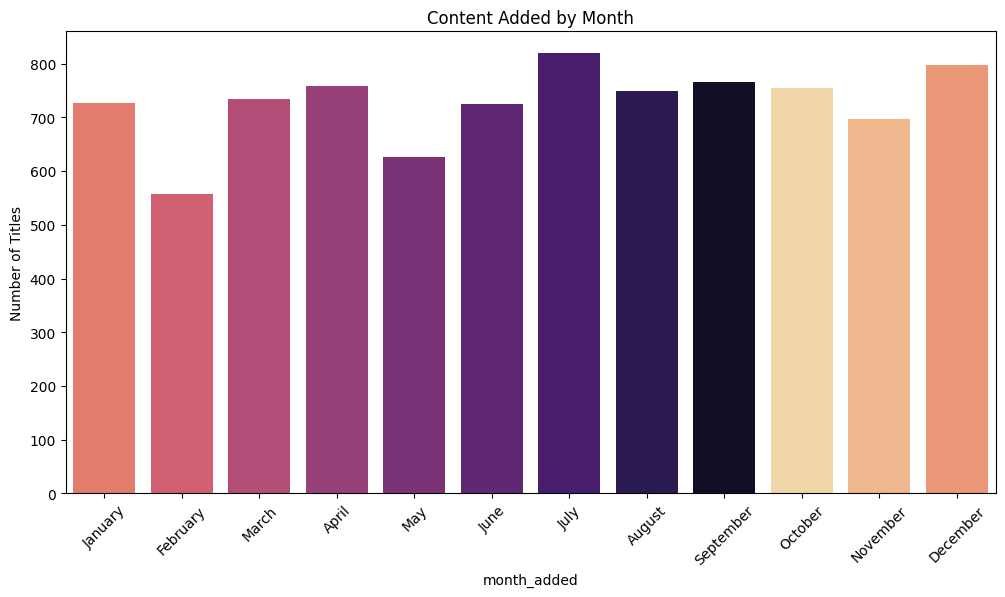

In [81]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='month_added', hue='month_added', order=month_order, palette='magma', legend=False)
plt.title("Content Added by Month")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.show()


# Key insights according to the analysis of the data


KEY INSIGHTS!!

Content Type: Movies dominate Netflix’s library compared to TV Shows.

Top Countries: The US produces the most content, followed by India and the UK.

Yearly Trend: Content production surged between 2015-2020.

Monthly Additions: Most content is added around July and December (holiday season hype).

Popular Genres: Documentaries, Dramas, and Comedies are top genres.